In [1]:
#  A regression attempts to fit a of function to observed data to make predictions on new data.
# A linear regression fits a straight line to observed data, attempting to demonstrate a linear relationship
# between variables and make predictions on new data yet to be observed.

m = [1.93939394]
b = [4.73333333]


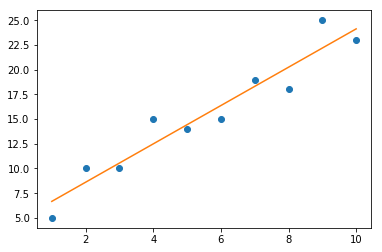

In [3]:
# Scikit-Learn to perform a basic, unvalidated linear regression on the sample of 10 dogs.
from matplotlib import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()

In [4]:
# #  The residual is the numeric difference between the line and the points

#  Another name for residuals are errors, because they reflect how wrong our line is in predicting the data.

# Calculating the residuals for a given line and data

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [5]:
# If we are fitting a straight line through our 10 data points, we likely want to minimize these residuals
# in total so there is as little of a gap as possible between the line and points.
# But how do we measure the “total”? The best approach is to take the sum of squares,
# which simply squares each residual, or multiplies each residual by itself, 
# and sums them. We take each actual y value and subtract from it the predicted y value taken from the line,
# then square and sum all those differences.

In [6]:
# You might wonder why we have to square the residuals before summing them.
# Why not just add them up without squaring?
# That will not work because the negatives will cancel out the positives.
# What if we add the absolute values, where we turn all negative values into positive values?
# That sounds promising but absolute values are mathematically inconvenient.
# More specifically, absolute values do not work well with Calculus derivatives 
# which we are going to use later for gradient descent. 
# This is why we choose the squared residuals as our way of totaling the loss.

In [7]:
# Calculating the sum of squares for a given line and data

points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

    
print("sum of squares = {}".format(sum_of_squares))

sum of squares = 28.096969704500005


In [8]:
# Calculating m and b for a simple linear regression

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) *
    sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) -
    sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


In [11]:
# Using inverse and transposed matrices to fit a linear regression

import pandas as pd
from numpy.linalg import inv,qr
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b) # [1.93939394 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)

print (y_predict)

[1.93939394 4.73333333]
[ 6.67272727  8.61212121 10.55151515 12.49090909 14.43030303 16.36969697
 18.30909091 20.24848485 22.18787879 24.12727273]


In [12]:
# Using QR decomposition to perform a linear regression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# calculate coefficents for slope and intercept
# using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b)


[1.93939394 4.73333333]


In [13]:
# Gradient descent is an optimization technique that uses derivatives and
# iterations to minimize/maximize a set of parameters against an objective.

# Using gradient descent to find the minimum of a parabola

import random


def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2*(x - 3)

# The learning rate
L = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

 # start at a random x
x = random.randint(-15,15)

for i in range(iterations):

    # get slope
    d_x = dx_f(x)

    # update x by subtracting the (learning rate) * (slope)
    x -= L * d_x

print(x, f(x))

3.000000000000111 4.0


In [14]:
# Performing gradient descent for a linear regression

# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

n = float(len(points))  # Number of elements in X

# Perform Gradient Descent
for i in range(iterations):

    # slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)

    # slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

    # update m and b
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))

y = 1.9393939393939548x + 4.733333333333227


In [15]:
# Calculating partial derivatives for m and b

from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)
print(d_m)
print(d_b)

Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [18]:
# Performing stochastic gradient descent for a linear regression


# Input data
data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]  # rows

# Building the model
m = 0.0
b = 0.0

sample_size = 1  # sample size
L = .0001  # The learning Rate
epochs = 1_000_000  # The number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # The current predicted value of Y
    Y_pred = m * x_sample + b

    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))

    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update b

    # print progress
    if i % 10000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))

0 0.006 0.002
10000 2.36326760682638 1.8835518624103165
20000 2.208478682839455 2.860757272083633
30000 2.0990271430034566 3.5015104981731477
40000 2.059718240314351 3.918670691928773
50000 2.0254319787495616 4.228272179662717
60000 2.0128706983709828 4.3987557816635325
70000 1.9588699155518574 4.511397889311558
80000 1.9572242882073074 4.573105411192914
90000 1.9603079930214902 4.646560110817617
100000 1.915286401953193 4.679197268853813
110000 1.9403467582673453 4.694118062444541
120000 1.9599274086298113 4.725943861094068
130000 1.9368722399981075 4.7143432848607825
140000 1.963520934610125 4.71478629302077
150000 1.9360986672130869 4.728305205329085
160000 1.9324433155776284 4.741555567620757
170000 1.926229705774608 4.7507334297890695
180000 1.9432750003962185 4.731457564467172
190000 1.9652083911680416 4.750695486563088
200000 1.924857106440728 4.741023799177265
210000 1.949168382522107 4.742302871466551
220000 1.9482919821971325 4.732498280457749
230000 1.9436648255769589 4.7442

In [19]:
# correlation coefficient, also called the Pearson correlation,
# which measures the strength of the relationship between two variables as a value 
# between -1 and 1. A correlation coefficient closer to 0 indicates there is no correlation.
# A correlation coefficient closer to 1 indicates a strong positive correlation,
# meaning when one variable increases the other proportionally increases.
# If it is closer to -1 then it indicates a strong negative correlation,
# which means as one variable increases the other proportionally decreases.

In [20]:
# Using Pandas to see the correlation coefficent between every pair of variables

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# Print correlations between variables
correlations = df.corr(method='pearson')
print(correlations)


          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [21]:
# Calculating correlation coefficient from scratch in Python

from math import sqrt

# Import points from CSV
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * sum(p.y for p in points)

denominator = sqrt(n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2) \
              * sqrt(n*sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator

print(corr)

0.9575860952087218


In [22]:
#  Calculating the critical value from a T-distribution

from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)

-2.262157162740992 2.2621571627409915


In [23]:
# Testing significance for linear-looking data

from scipy.stats import t
from math import sqrt

# sample size
n = 10

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient
# derived from data https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))

TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.262157162740992, 2.2621571627409915
CORRELATION PROVEN, REJECT H0
P-VALUE: 5.9763860877914965e-06


In [24]:
# Creating a correlation matrix in Pandas

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")

# Print correlations between variables
coeff_determination = df.corr(method='pearson') ** 2
print(coeff_determination)

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


In [25]:
# Calculating a prediction interval of vet visits for a dog that’s 8.5 years old

from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())

n = len(points)

# Linear Regression Line
m = 1.939
b = 4.733

# Calculate Prediction Interval for x = 8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)

16.462516875955465 25.966483124044537


In [26]:
# Doing a train/test split on linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("R^2: %.3f" % result)

R^2: 0.993


In [27]:
# Using 3-fold cross validation for a linear regression


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean=0.993 (stdev-0.000)


In [28]:
# Using a random-fold validation for a linear regression


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean=0.993 (stdev-0.000)


In [29]:
#  A linear regressoin with two input variables

# Load the data
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Training
fit = LinearRegression().fit(X, Y)

# Print coefficients
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))

Coefficients = [2.00672647 3.00203798]
Intercept = 20.109432820035963
z = 20.109432820035963 + 2.0067264725128062x + 3.002037976646693y
